In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import urllib.request

In [25]:
url = 'https://github.com/CSSEGISandData/COVID-19/archive/master.zip'
urllib.request.urlretrieve(url,'./master.zip')

('./master.zip', <http.client.HTTPMessage at 0x7f2624043990>)

In [26]:
import zipfile
with zipfile.ZipFile("master.zip","r") as zip_ref:
    zip_ref.extractall("./")

In [27]:
from pathlib import Path, PurePath
dataDir  = Path('./COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/')

In [28]:
import pandas as pd
dfs = []
for file in dataDir.iterdir():
    if file.suffix=='.csv':
        dfs.append(pd.read_csv(file))
        
len(dfs)

68

In [29]:
timeSeriesURL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(timeSeriesURL,'./timeSeries.csv')

('./timeSeries.csv', <http.client.HTTPMessage at 0x7f26341ed410>)

In [30]:
data = pd.read_csv('timeSeries.csv')
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,8,10
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [31]:
data.rename(columns={'Country/Region':'Country'},inplace=True)
data.drop(columns=['Province/State','Lat','Long'],inplace=True)

In [32]:
data = data.groupby('Country').sum().reset_index()

In [33]:
df = pd.melt(data,id_vars=['Country'],var_name='Date',value_name='Confirmados').copy()

In [34]:
df['Date'] = pd.to_datetime(df.Date)

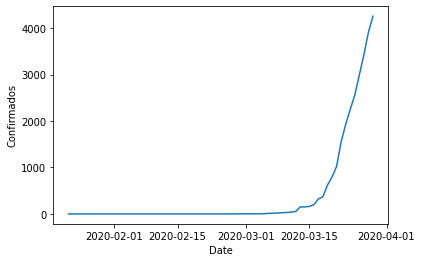

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Date',y='Confirmados',data=df[df['Country']=='Brazil'])

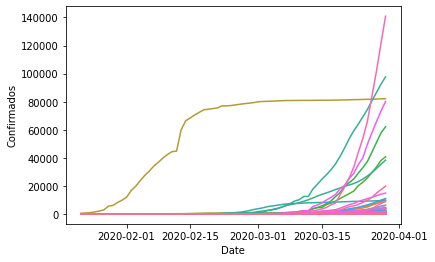

In [39]:
sns.lineplot(x='Date',y='Confirmados',data=df,hue='Country',legend=False)

In [40]:
df.groupby('Country').max().sort_values(by='Confirmados',ascending=False).reset_index().head(20)

,Country,Date,Confirmados
0,US,2020-03-29,140886
1,Italy,2020-03-29,97689
2,China,2020-03-29,82122
3,Spain,2020-03-29,80110
4,Germany,2020-03-29,62095
5,France,2020-03-29,40708
6,Iran,2020-03-29,38309
7,United Kingdom,2020-03-29,19780
8,Switzerland,2020-03-29,14829
9,Netherlands,2020-03-29,10930


In [41]:
top20Countries = df.groupby('Country').max().sort_values(by='Confirmados',ascending=False).reset_index().head(20)['Country'].values
top20Countries

array(['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Netherlands', 'Belgium',
       'Korea, South', 'Turkey', 'Austria', 'Canada', 'Portugal',
       'Norway', 'Brazil', 'Israel', 'Australia'], dtype=object)

In [42]:
newCases = data.set_index('Country').diff(axis=1).reset_index().copy()
newCases = pd.melt(newCases,id_vars=['Country'],var_name='Date',value_name='NewCases').copy()
newCases['Date'] = pd.to_datetime(newCases.Date)
newCases = newCases.sort_values(by='Date',ascending=True)
newCases = newCases.reset_index()
newCases

,index,Country,Date,NewCases
0,0,Afghanistan,2020-01-22,NaN
1,113,Morocco,2020-01-22,NaN
2,114,Mozambique,2020-01-22,NaN
3,115,Namibia,2020-01-22,NaN
4,116,Nepal,2020-01-22,NaN
...,...,...,...,...
12031,11920,Gambia,2020-03-29,1.0
12032,11921,Georgia,2020-03-29,1.0
12033,11922,Germany,2020-03-29,4400.0
12034,11901,Cyprus,2020-03-29,35.0


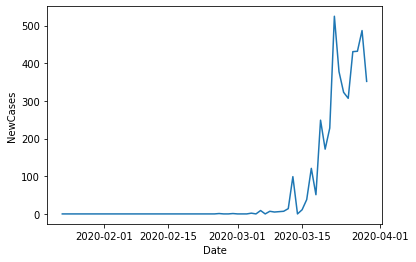

In [43]:
sns.lineplot(x='Date',y='NewCases',data=newCases[newCases['Country']=='Brazil'])

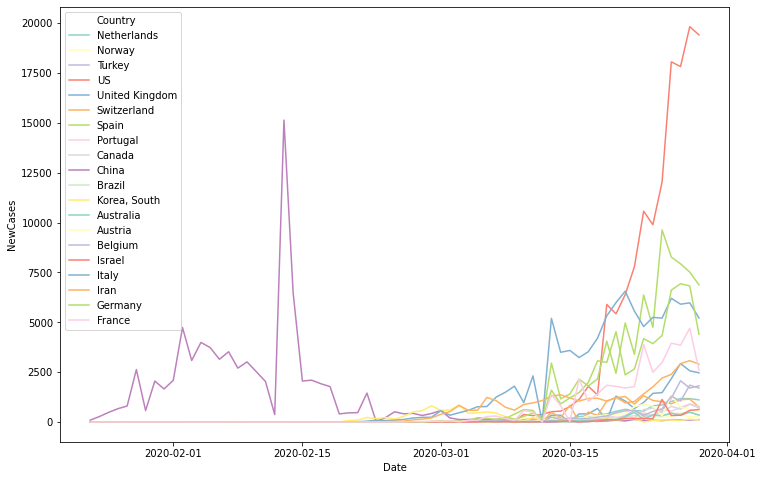

In [44]:
plt.figure(figsize=(12,8))
g = sns.lineplot(x='Date',
             y='NewCases',
             data=newCases[newCases.Country.isin(top20Countries)],
             palette='Set3',
             hue='Country')

In [45]:
fullDf = pd.merge(df,newCases,how='inner',on=['Country','Date'])
fullDf

,Country,Date,Confirmados,index,NewCases
0,Afghanistan,2020-01-22,0,0,NaN
1,Albania,2020-01-22,0,1,NaN
2,Algeria,2020-01-22,0,2,NaN
3,Andorra,2020-01-22,0,3,NaN
4,Angola,2020-01-22,0,4,NaN
...,...,...,...,...,...
12031,Venezuela,2020-03-29,119,12031,0.0
12032,Vietnam,2020-03-29,188,12032,14.0
12033,West Bank and Gaza,2020-03-29,109,12033,11.0
12034,Zambia,2020-03-29,29,12034,1.0


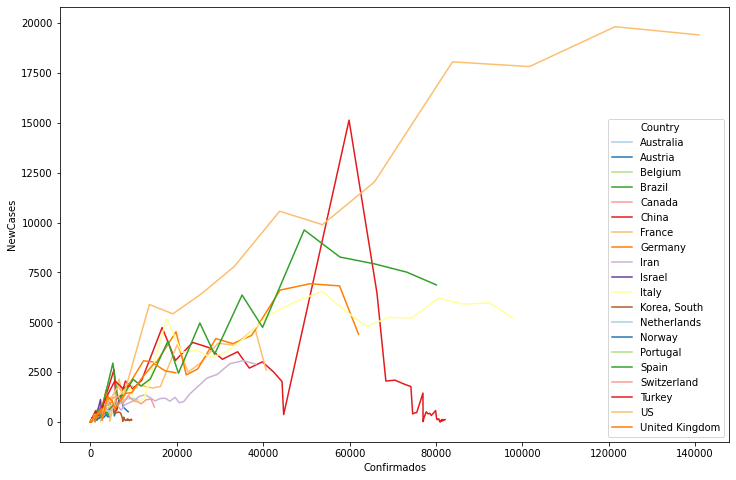

In [46]:
plt.figure(figsize=(12,8))
g = sns.lineplot(x='Confirmados',
                 y='NewCases',
                 hue='Country',
                 palette='Paired',
                 data=fullDf[fullDf.Country.isin(top20Countries)]
                )
# g.set(yscale='log',xscale='log')

<Figure size 864x576 with 0 Axes>

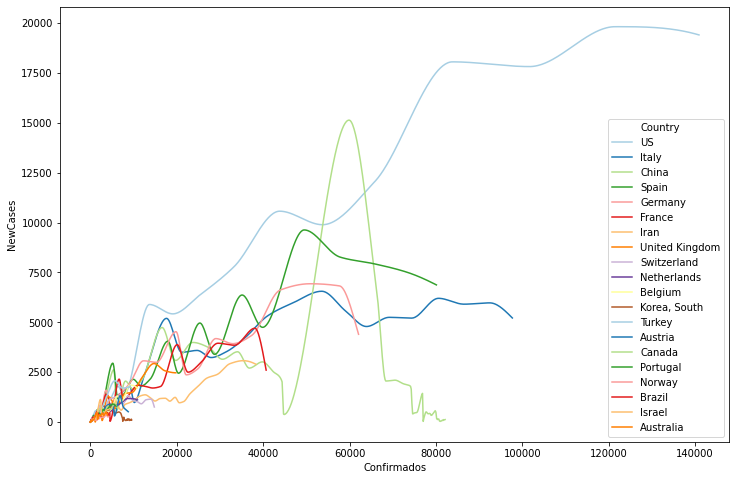

In [47]:
import scipy as sp
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import pchip
import numpy as np


def smoothV1(df,x_column,Y_column):
    df[x_column] = pd.to_numeric(df[x_column])
    df[Y_column] = pd.to_numeric(df[Y_column])
    df = df.groupby(x_column).max().reset_index()
    df.dropna(subset=[x_column,Y_column],inplace=True)
    x,Y = df[x_column].values, df[Y_column].values
    newx = np.linspace(x.min(), x.max(), 500)
    newY = sp.interpolate.interp1d(x, Y, kind='cubic')(newx)
    return pd.DataFrame({x_column:newx,Y_column:newY})


def smoothV2(df,x_column,Y_column):
    df[x_column] = pd.to_numeric(df[x_column])
    df[Y_column] = pd.to_numeric(df[Y_column])
    df = df.groupby(x_column).max().reset_index()
    df.dropna(subset=[x_column,Y_column],inplace=True)
    x,Y = df[x_column].values, df[Y_column].values
    newx = np.linspace(x.min(), x.max(), 500)
    newY = pchip(x,Y)(newx)
    return pd.DataFrame({x_column:newx,Y_column:newY})

plt.figure(figsize=(12,8))

smoothCountriesDf = []
for country in top20Countries:
    countryDf = fullDf[fullDf.Country==country][['Confirmados','NewCases']].copy()
    countryDf = smoothV2(countryDf,'Confirmados','NewCases')
    countryDf['Country'] = country
    smoothCountriesDf.append(countryDf)
    
plt.figure(figsize=(12,8))
g = sns.lineplot(x='Confirmados',
                 y='NewCases',
                 hue='Country',
                 palette='Paired',
                 data=pd.concat(smoothCountriesDf)
                )
# g.set(yscale='log',xscale='log')